In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-09-13,15400,15519,15320,15400,234851
1,2010-09-14,15500,15620,15200,15200,371530
2,2010-09-15,15260,15340,15020,15140,389289
3,2010-09-16,15080,15260,15080,15140,234815
4,2010-09-17,15240,15560,15159,15460,447649


In [4]:
ss = pd.read_csv("sample_submission.csv")

In [5]:
ss.head()

,Date,Predicted
0,2017-04-13,0
1,2017-04-14,0
2,2017-04-17,0
3,2017-04-18,0
4,2017-04-19,0


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,1628.000000,1628.000000,1628.000000,1628.000000,1.628000e+03
mean,25557.827396,25813.232187,25303.552211,25564.656020,2.880353e+05
std,5412.200956,5457.414669,5394.723398,5436.660567,1.355355e+05
min,13680.000000,13940.000000,13440.000000,13600.000000,6.598500e+04
25%,22690.000000,22970.000000,22480.000000,22700.000000,1.991875e+05
50%,25900.000000,26080.000000,25670.000000,25900.000000,2.534460e+05
75%,28545.000000,28844.750000,28300.000000,28545.000000,3.364635e+05
max,42200.000000,42680.000000,41880.000000,42560.000000,1.277983e+06


In [7]:
df.tail(5)

,Date,Open,High,Low,Close,Volume
1623,2017-04-06,42000,42080,41600,41840,193668
1624,2017-04-07,41800,41820,41160,41600,200420
1625,2017-04-10,41940,41940,41500,41940,142827
1626,2017-04-11,41940,41940,41580,41600,143458
1627,2017-04-12,41860,41940,41700,41900,165498


In [8]:
ss.tail(5)

,Date,Predicted
1081,2021-09-07,0
1082,2021-09-08,0
1083,2021-09-09,0
1084,2021-09-10,0
1085,2021-09-13,0


In [9]:
def plot_df(df, x, y, title="", xlabel="Date", ylabel="Value", dpi=200): #function to plot overall graph
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()   

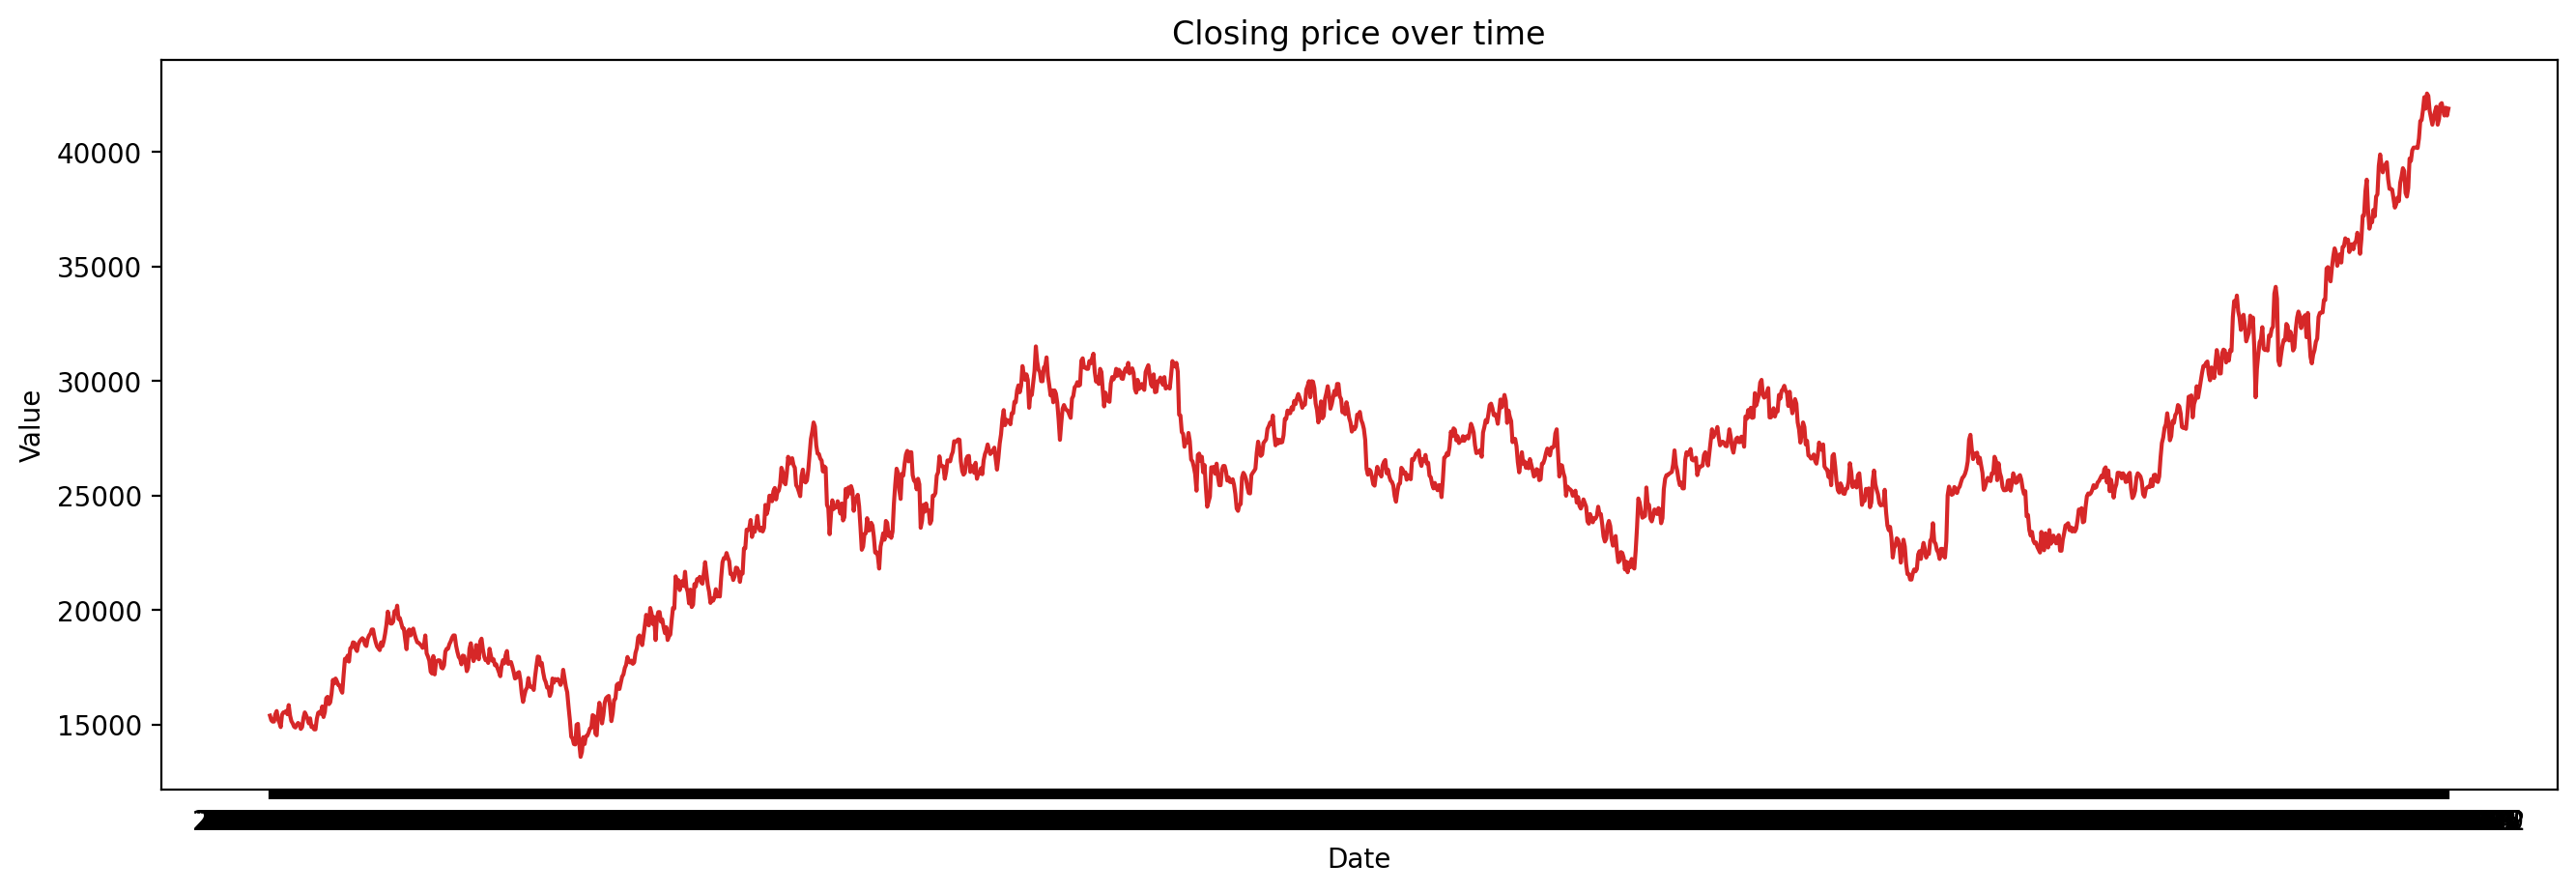

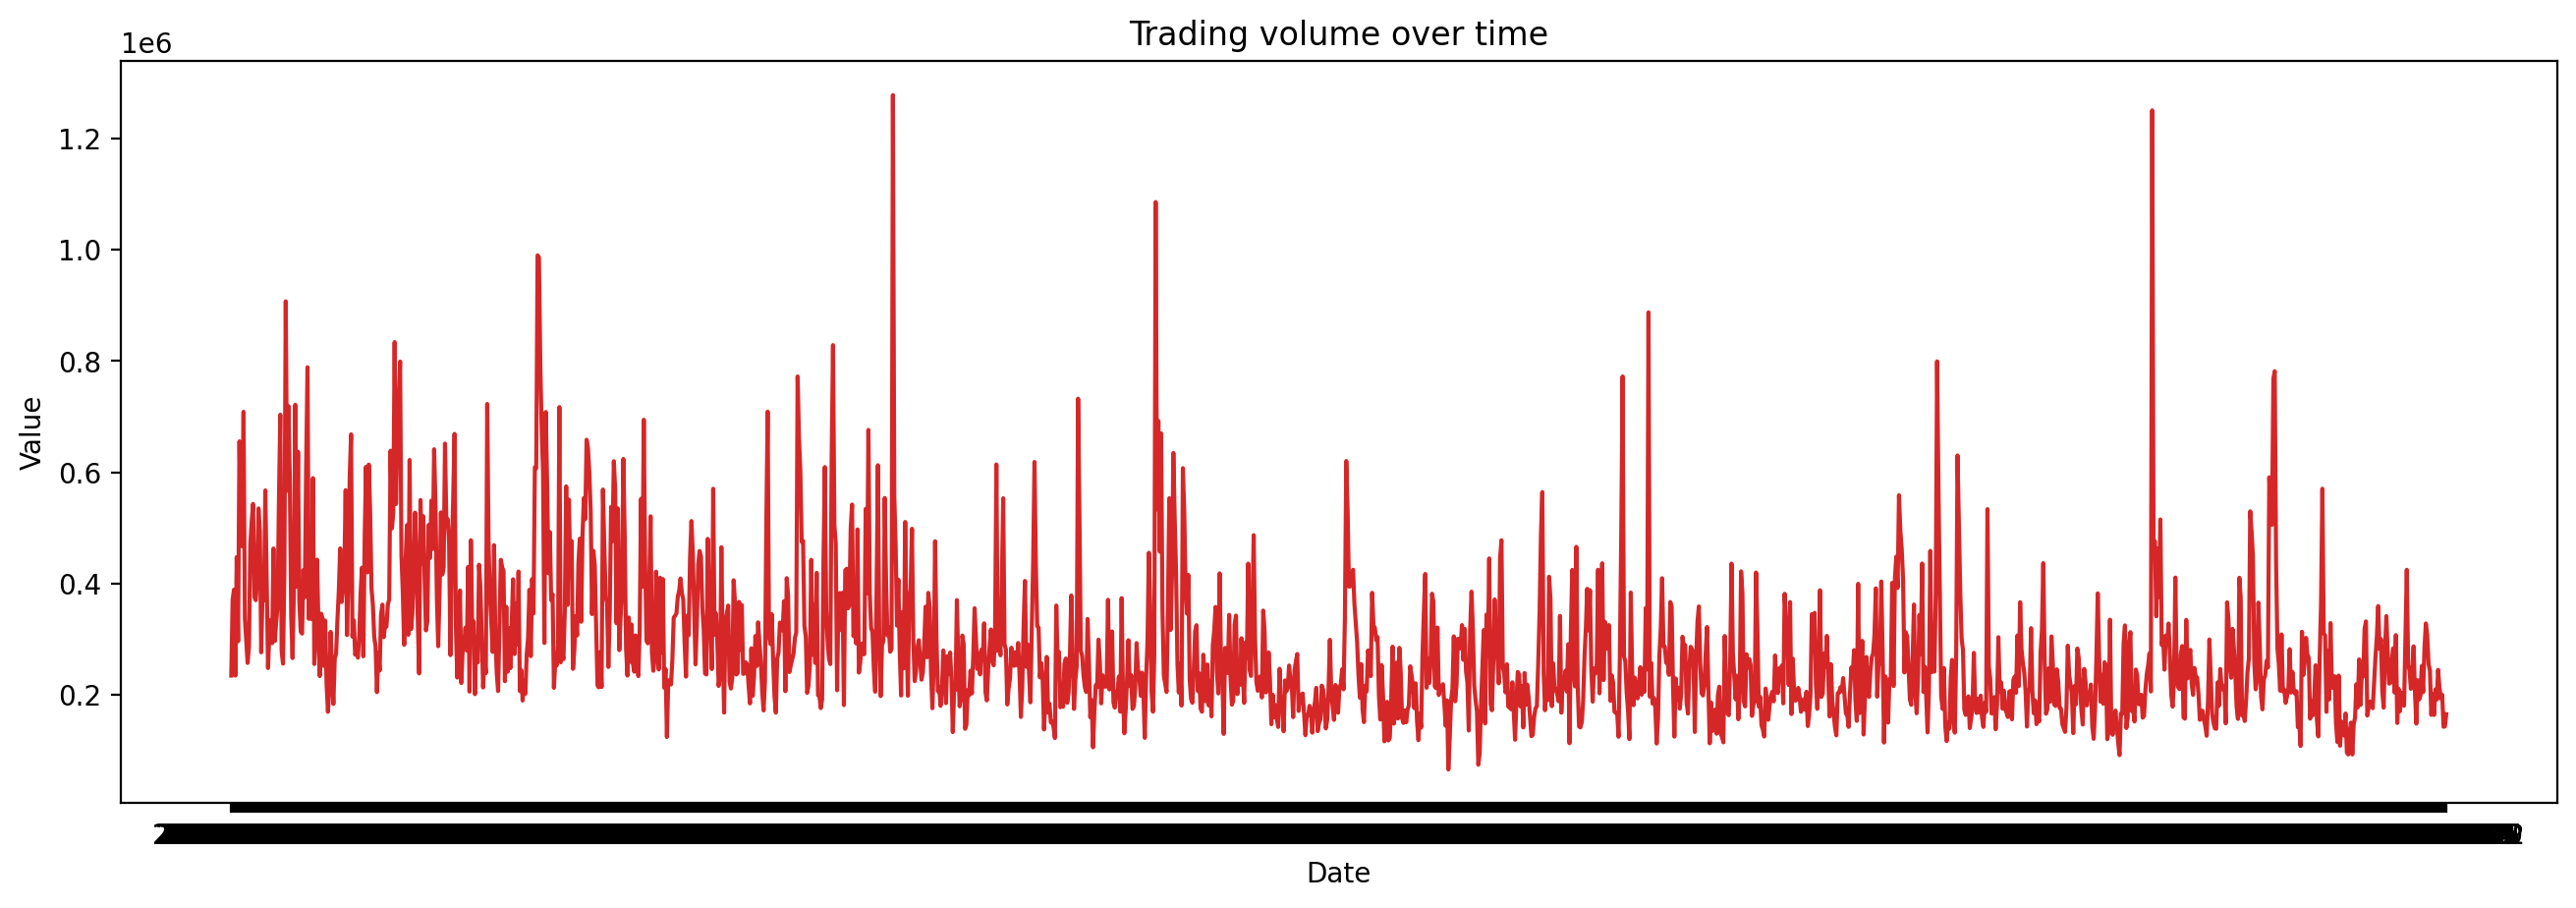

In [10]:
plot_df(df, x=df.Date, y=df.Close, title="Closing price over time") 
plot_df(df, x=df.Date, y=df.Volume, title="Trading volume over time")

In [11]:
df["diff_1"] = df["Close"].diff() #differencing with difference 1

In [13]:
df['diff_2'] = df["Close"].diff(periods=2) #difference 2

In [14]:
df

,Date,Open,High,Low,Close,Volume,diff_1,diff_2
0,2010-09-13,15400,15519,15320,15400,234851,NaN,NaN
1,2010-09-14,15500,15620,15200,15200,371530,-200.0,NaN
2,2010-09-15,15260,15340,15020,15140,389289,-60.0,-260.0
3,2010-09-16,15080,15260,15080,15140,234815,0.0,-60.0
4,2010-09-17,15240,15560,15159,15460,447649,320.0,320.0
...,...,...,...,...,...,...,...,...
1623,2017-04-06,42000,42080,41600,41840,193668,-300.0,-240.0
1624,2017-04-07,41800,41820,41160,41600,200420,-240.0,-540.0
1625,2017-04-10,41940,41940,41500,41940,142827,340.0,100.0
1626,2017-04-11,41940,41940,41580,41600,143458,-340.0,0.0


In [143]:
def plot_df2(df, x, y1, y2, title="", xlabel="Date", ylabel="Value", dpi=200): #function to plot 2 graphs at once
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y1, color='tab:red')
    plt.plot(x, y2, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()   

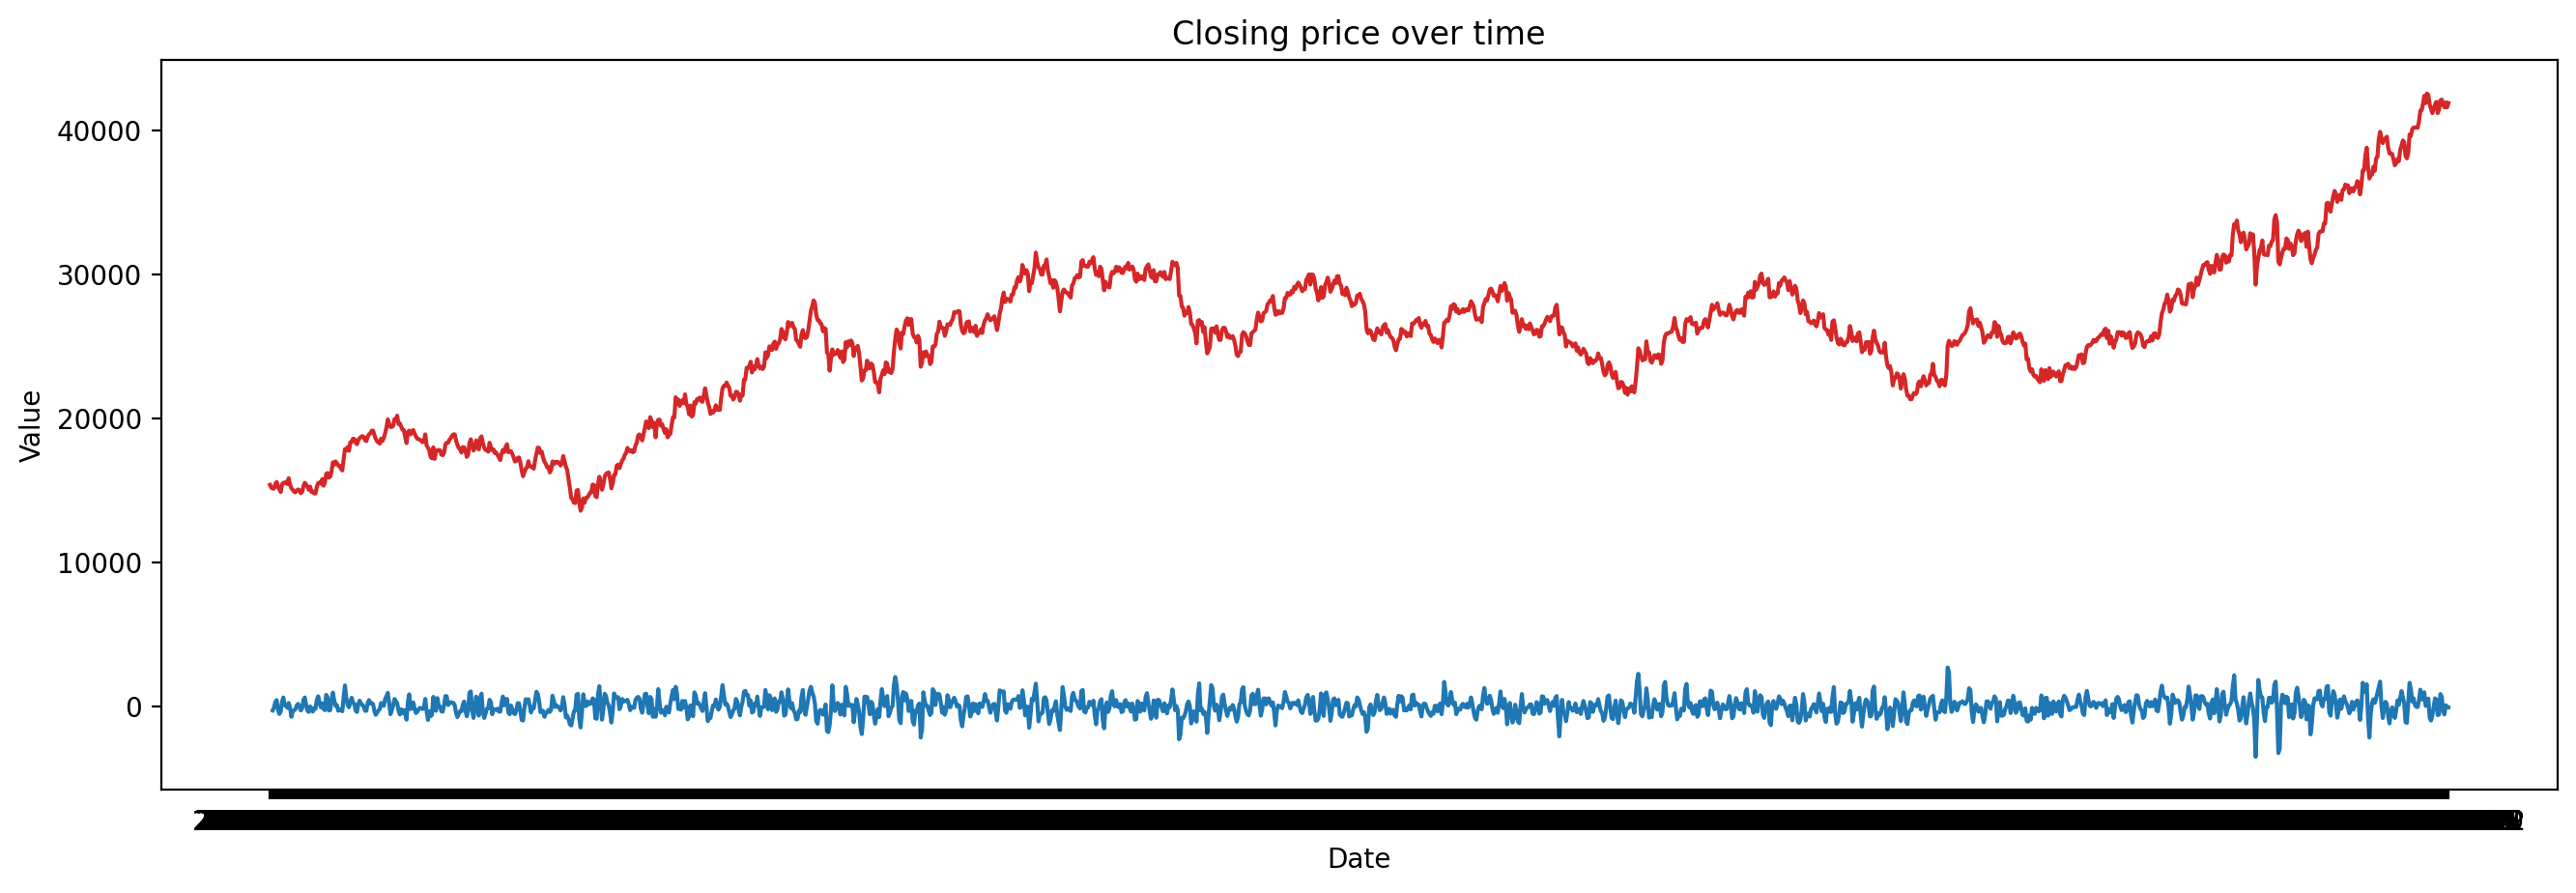

In [144]:
plot_df2(df, x=df.Date, y1=df.Close, y2=df.diff_2, title="Closing price over time")

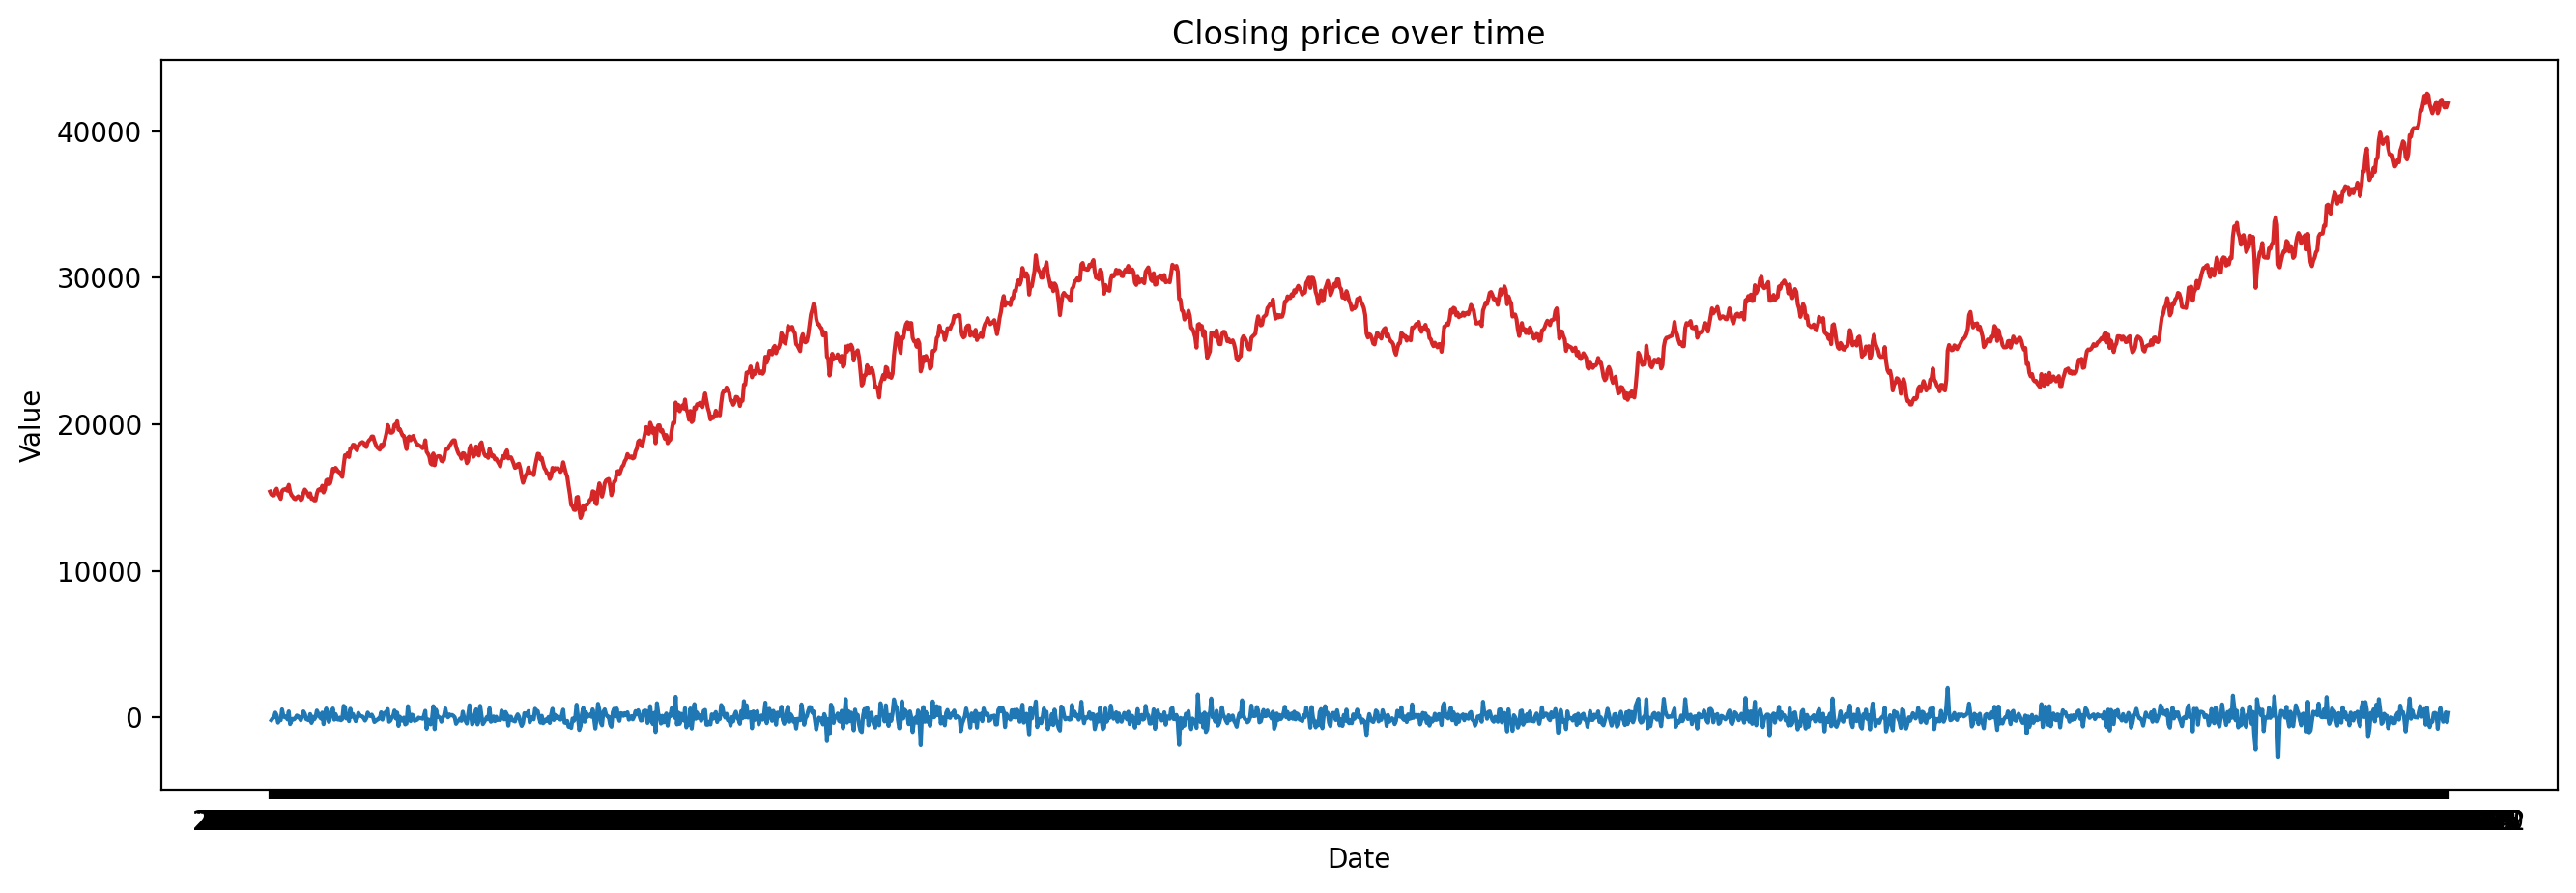

In [17]:
plot_df2(df, x=df.Date, y1=df.Close, y2=df.diff_1, title="Closing price over time")

In [18]:
from pandas.plotting import autocorrelation_plot

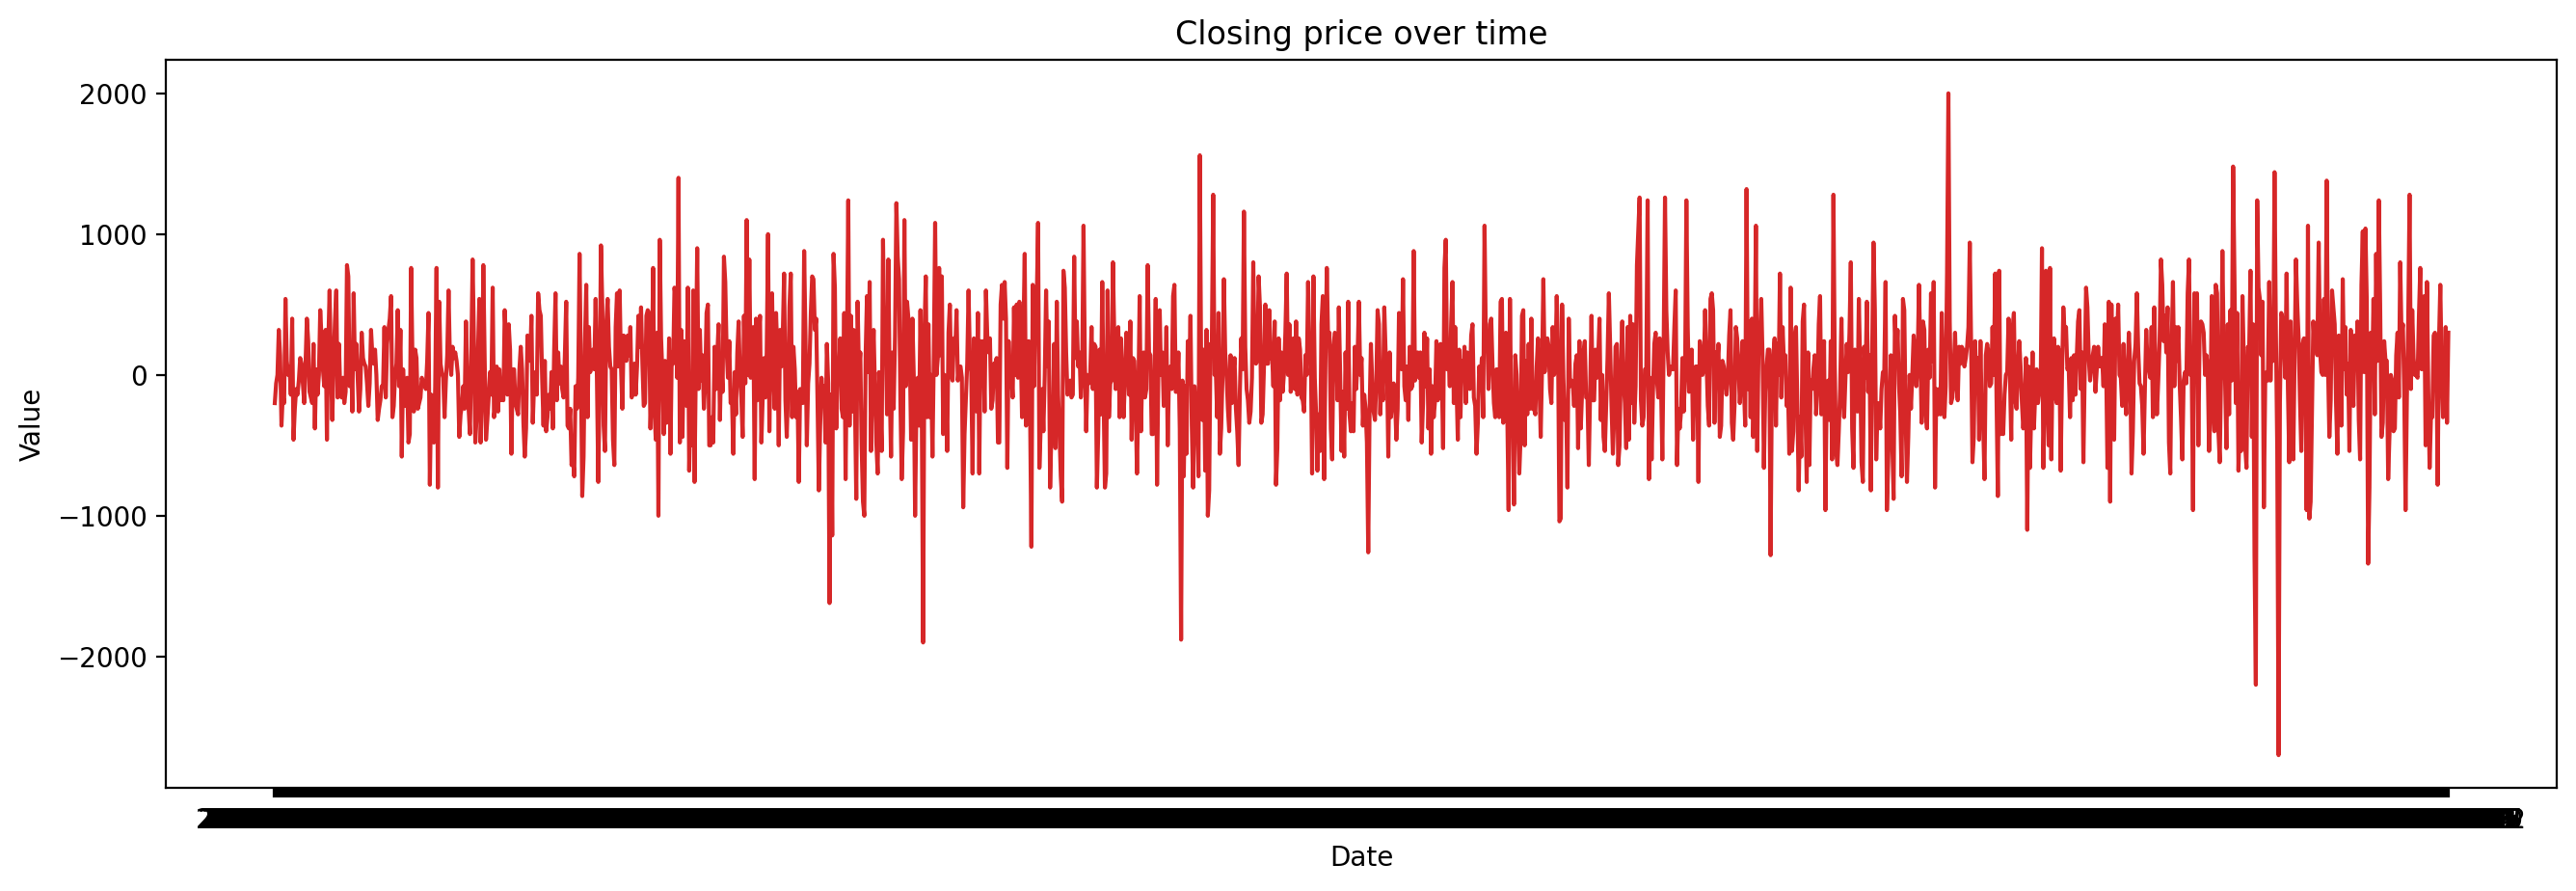

In [19]:
plot_df(df, x=df.Date, y=df.diff_1, title="Closing price over time")

In [21]:
from pandas.plotting import lag_plot
from pandas import datetime

<ipython-input-21-d0d3ca4130ca>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


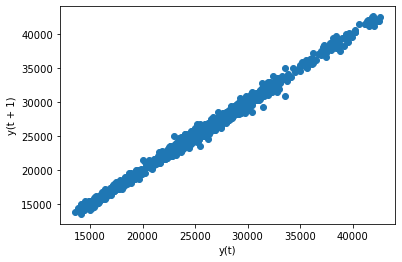

In [22]:
plt.figure()
lag_plot(df["Close"], lag=1) #to analyze correlation between previous closing value and current
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller #adfuller test for stationary

In [24]:
result = adfuller(df.diff_1.dropna())

In [25]:
result #p-value=0.0, it is stationary

(-26.443846853859423,
 0.0,
 2,
 1624,
 {'1%': -3.4343830457666806,
  '5%': -2.8633213561112156,
  '10%': -2.5677183557141645},
 23996.81374455557)

In [26]:
result_original=adfuller(df.Close)

In [27]:
result_original #not stationary as p-value =0.89

(-0.46915539367937603,
 0.8978963725565918,
 3,
 1624,
 {'1%': -3.4343830457666806,
  '5%': -2.8633213561112156,
  '10%': -2.5677183557141645},
 24012.742007235305)

In [30]:
df1=df[["Date","diff_1"]]

In [31]:
df1

,Date,diff_1
0,2010-09-13,NaN
1,2010-09-14,-200.0
2,2010-09-15,-60.0
3,2010-09-16,0.0
4,2010-09-17,320.0
...,...,...
1623,2017-04-06,-300.0
1624,2017-04-07,-240.0
1625,2017-04-10,340.0
1626,2017-04-11,-340.0


In [32]:
df1["diff_1"]=df1["diff_1"].fillna(0)

<ipython-input-32-bd2b076c8779>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["diff_1"]=df1["diff_1"].fillna(0)


In [33]:
df1

,Date,diff_1
0,2010-09-13,0.0
1,2010-09-14,-200.0
2,2010-09-15,-60.0
3,2010-09-16,0.0
4,2010-09-17,320.0
...,...,...
1623,2017-04-06,-300.0
1624,2017-04-07,-240.0
1625,2017-04-10,340.0
1626,2017-04-11,-340.0


In [35]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
%matplotlib inline

In [38]:
df1["Date"]=df1["Date"].astype("datetime64")

<ipython-input-38-6f122fdbf333>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Date"]=df1["Date"].astype("datetime64")


In [39]:
df1=df1.set_index("Date")

In [40]:
df1

,diff_1
Date,
2010-09-13,0.0
2010-09-14,-200.0
2010-09-15,-60.0
2010-09-16,0.0
2010-09-17,320.0
...,...
2017-04-06,-300.0
2017-04-07,-240.0
2017-04-10,340.0


(-0.1, 0.1)

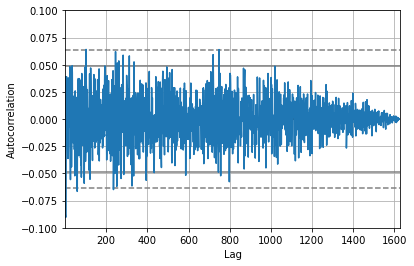

In [44]:
autocorrelation_plot(df1) #tried to use autocorrelation to determine p parameter for ARIMA but not able to
axes=plt.gca()
axes.set_ylim([-0.1,0.1])

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf

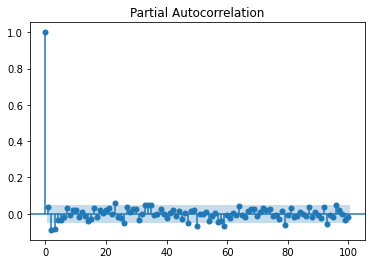

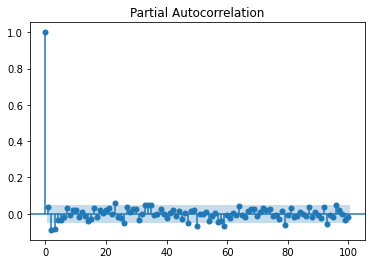

In [46]:
plot_pacf(df1, lags=100) #partial auto correlation does not provide much data on what q parameter i should use

In [50]:
df_closing=df[["Date","Close"]] #same thing as above but with undifferenced values just to see the results
df_closing["Date"]=df_closing["Date"].astype("datetime64")

<ipython-input-50-cc2c9fc9e441>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_closing["Date"]=df_closing["Date"].astype("datetime64")


In [51]:
df_closing=df_closing.set_index("Date")

In [52]:
df_closing

,Close
Date,
2010-09-13,15400
2010-09-14,15200
2010-09-15,15140
2010-09-16,15140
2010-09-17,15460
...,...
2017-04-06,41840
2017-04-07,41600
2017-04-10,41940


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

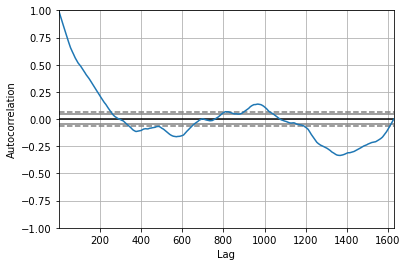

In [53]:
autocorrelation_plot(df_closing)

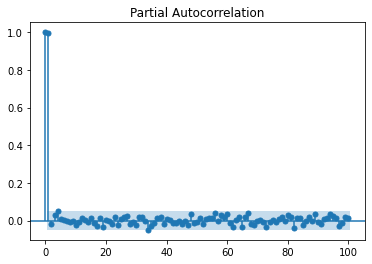

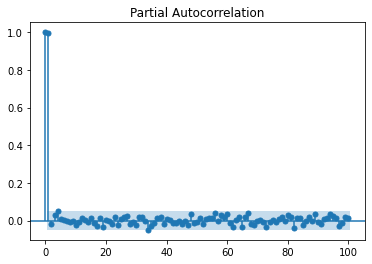

In [54]:
plot_pacf(df_closing, lags=100) #Thinking that a value of 1 or 2 for q parameter might be best

In [55]:
from pandas import datetime

<ipython-input-55-5d3ca00b7d92>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [56]:
df

,Date,Open,High,Low,Close,Volume,diff_1,diff_2
0,2010-09-13,15400,15519,15320,15400,234851,NaN,NaN
1,2010-09-14,15500,15620,15200,15200,371530,-200.0,NaN
2,2010-09-15,15260,15340,15020,15140,389289,-60.0,-260.0
3,2010-09-16,15080,15260,15080,15140,234815,0.0,-60.0
4,2010-09-17,15240,15560,15159,15460,447649,320.0,320.0
...,...,...,...,...,...,...,...,...
1623,2017-04-06,42000,42080,41600,41840,193668,-300.0,-240.0
1624,2017-04-07,41800,41820,41160,41600,200420,-240.0,-540.0
1625,2017-04-10,41940,41940,41500,41940,142827,340.0,100.0
1626,2017-04-11,41940,41940,41580,41600,143458,-340.0,0.0


In [57]:
df_closing

,Close
Date,
2010-09-13,15400
2010-09-14,15200
2010-09-15,15140
2010-09-16,15140
2010-09-17,15460
...,...
2017-04-06,41840
2017-04-07,41600
2017-04-10,41940


In [58]:
from statsmodels.tsa.arima_model import ARIMA

In [59]:
df_train, df_test = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):] #test train split

training_data = df_train["Close"].values
test_data = df_test["Close"].values

In [60]:
model = ARIMA(training_data, order=(1,1,1)) #ARIMA, parameters are more or less found using trial and error to minimize aic value since earlier analysis did not provide sufficient information.
model_fit=model.fit()

C:\Users\bsmat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\bsmat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [61]:
model_fit.aic

16945.49050127111

In [90]:
model2 = ARIMA(training_data, order=(3,1,0)) #autoregression, testing if AR by itself will be more ideal
model_fit2=model2.fit()

In [91]:
model_fit2.aic

16940.553710133012

In [141]:
model3 = ARIMA(training_data, order=(0,1,2)) #moving average, testing if MA by itself will be more ideal
model_fit3=model3.fit()

In [142]:
model_fit3.aic

16942.217808898087

In [114]:
model = ARIMA(training_data, order=(1,1,2))
model_fit=model.fit()

C:\Users\bsmat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [115]:
model_fit.aic #lowest aic found using trial and error so I will use this ARIMA model with (1,1,2) parameters

16938.6964551301

In [116]:
model_forecast = model_fit.forecast(steps=50)[0]

model_forecast

In [117]:
model_forecast

array([28946.11672017, 28971.15627933, 28991.30907934, 29008.39896926,
       29023.56909643, 29037.53595973, 29050.74864446, 29063.48862712,
       29075.93233082, 29088.19033357, 29100.33194316, 29112.40060016,
       29124.42353212, 29136.41780466, 29148.39411412, 29160.35916474,
       29172.31715856, 29184.27072935, 29196.22152788, 29208.17058881,
       29220.11856067, 29232.06584991, 29244.01271131, 29255.95930454,
       29267.90572969, 29279.8520495 , 29291.79830327, 29303.74451566,
       29315.69070211, 29327.6368723 , 29339.5830323 , 29351.52918592,
       29363.47533553, 29375.42148263, 29387.36762816, 29399.3137727 ,
       29411.25991663, 29423.20606016, 29435.15220346, 29447.0983466 ,
       29459.04448965, 29470.99063264, 29482.93677559, 29494.88291851,
       29506.82906142, 29518.77520433, 29530.72134722, 29542.66749012,
       29554.61363301, 29566.5597759 ])

In [118]:
test_data

array([29220, 29020, 28200, 27900, 27320, 27700, 28200, 28000, 27240,
       27400, 26760, 26720, 26620, 26660, 26800, 26520, 26400, 26760,
       27320, 27040, 27000, 27240, 26280, 26180, 26140, 25820, 26060,
       25460, 26740, 26820, 26280, 25640, 25240, 25140, 25540, 25400,
       25100, 25080, 25300, 25320, 25620, 26420, 26040, 25380, 25560,
       25620, 25360, 25900, 25980, 25360, 24600, 24800, 24780, 25300,
       25180, 25320, 24500, 24700, 25640, 26100, 25500, 25260, 25060,
       24680, 24580, 24600, 24600, 25260, 24300, 23700, 23500, 23640,
       23180, 22300, 22720, 22820, 23140, 23080, 22800, 22080, 22620,
       23080, 22780, 22020, 21580, 21580, 21340, 21340, 21620, 21780,
       21700, 21800, 22440, 22580, 22240, 22620, 22940, 22680, 22300,
       22480, 22460, 23040, 23140, 23800, 23000, 22900, 22620, 22520,
       22240, 22680, 22680, 22380, 22300, 23020, 25020, 25400, 25200,
       25040, 25080, 25380, 25300, 25120, 25320, 25400, 25600, 25780,
       25840, 25960,

In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
np.sqrt(mean_squared_error(test_data[:50],model_forecast))

3049.0003092364495

In [121]:
ss

,Date,Predicted
0,2017-04-13,41912.871190
1,2017-04-14,41926.485861
2,2017-04-17,41940.683330
3,2017-04-18,41955.337641
4,2017-04-19,41970.350063
...,...,...
1081,2021-09-07,59532.903546
1082,2021-09-08,59549.214841
1083,2021-09-09,59565.526136
1084,2021-09-10,59581.837431


In [131]:
all_data = df["Close"].values

In [132]:
model_final = ARIMA(all_data, order=(1,1,2))
model_final_fit=model_final.fit()

C:\Users\bsmat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\bsmat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [133]:
model_final_fit.aic

24369.513594432858

In [134]:
model_final_forecast = model_final_fit.forecast(steps=1086)[0]

In [135]:
model_final_forecast

array([41955.31919818, 41956.89390299, 41965.10762153, ...,
       59591.76066733, 59608.07568927, 59624.39071121])

In [136]:
len(model_final_forecast)

1086

In [137]:
ss["Predicted"]=model_final_forecast

In [138]:
ss

,Date,Predicted
0,2017-04-13,41955.319198
1,2017-04-14,41956.893903
2,2017-04-17,41965.107622
3,2017-04-18,41976.970153
4,2017-04-19,41990.838079
...,...,...
1081,2021-09-07,59559.130623
1082,2021-09-08,59575.445645
1083,2021-09-09,59591.760667
1084,2021-09-10,59608.075689


In [139]:
ss.to_csv("Fintech Project 1 submission_final.csv", index=False)